<a href="https://colab.research.google.com/github/duncantanner/Assignments/blob/main/assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! git clone https://github.com/DS3001/knn



Cloning into 'knn'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 40 (delta 12), reused 4 (delta 4), pack-reused 22
Receiving objects: 100% (40/40), 11.00 MiB | 12.36 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [47]:
import numpy as np
import pandas as pd

df = pd.read_csv('./knn/data/USA_cars_datasets.csv')
df = df.loc[:, ['price', 'year', 'mileage'] ]
print('Question 1: \n')
print(df.shape)
df.head()

Question 1: 

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [48]:
#finding NA values
print(df.isna().sum())

#Maxmin year and mileage
def maxmin(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

df ['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])
print(df['year'])
print(df['mileage'])




price      0
year       0
mileage    0
dtype: int64
0       0.744681
1       0.808511
2       0.957447
3       0.872340
4       0.957447
          ...   
2494    0.978723
2495    0.957447
2496    0.957447
2497    0.957447
2498    0.957447
Name: year, Length: 2499, dtype: float64
0       0.269287
1       0.187194
2       0.038892
3       0.063016
4       0.006537
          ...   
2494    0.023193
2495    0.033944
2496    0.031037
2497    0.031983
2498    0.030818
Name: mileage, Length: 2499, dtype: float64


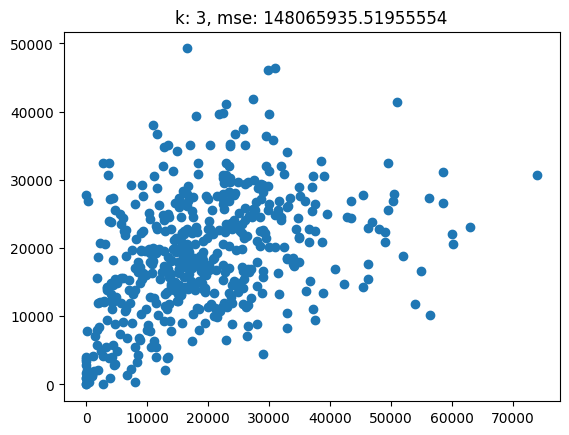

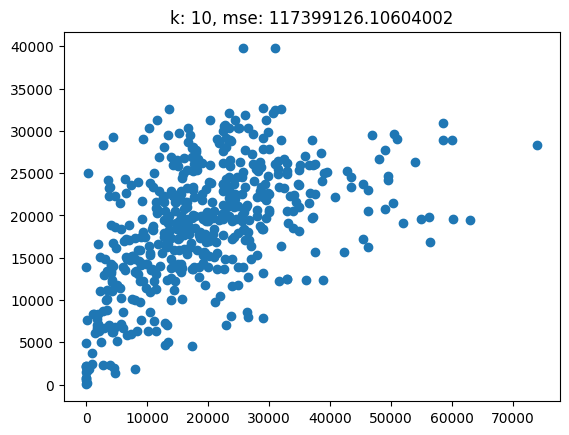

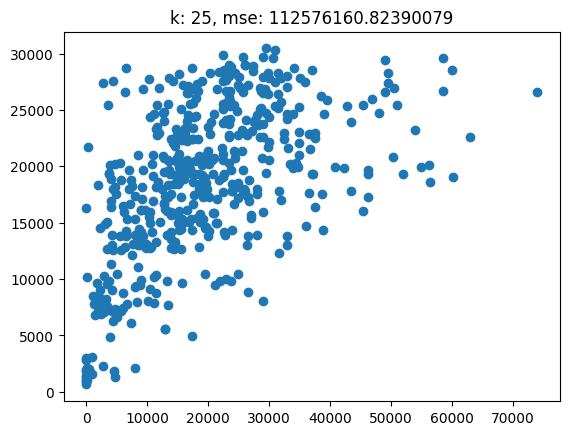

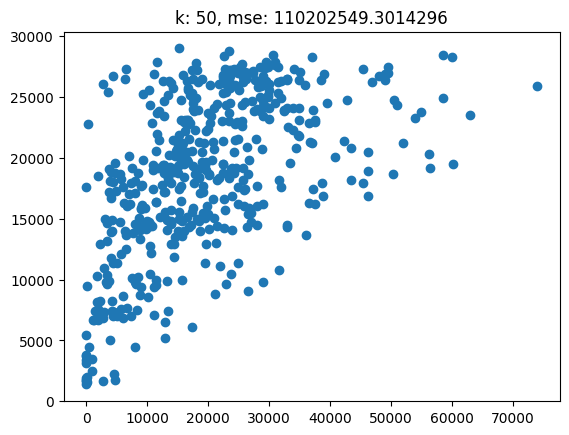

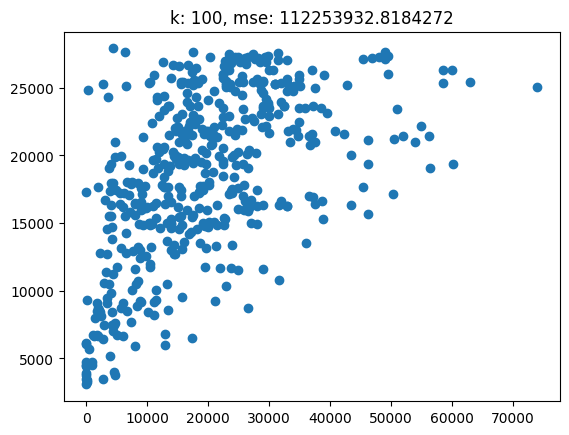

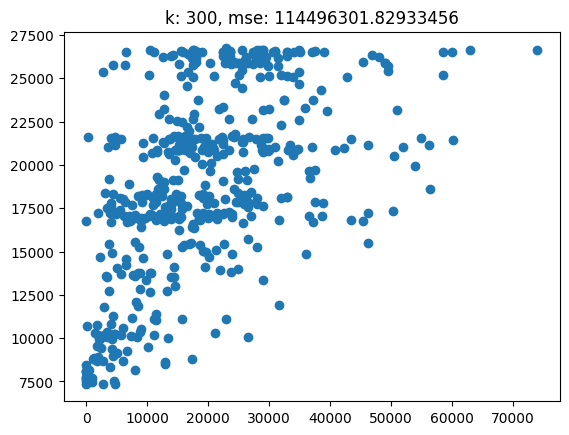

In [49]:
#Splitting data
from sklearn.model_selection import train_test_split

X = df[['year','mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#appying nearest neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_values = []
ks = range(1, 21) #example range

for k in [3, 10, 25, 50, 100, 300]:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_values.append(mse)

  #plotting

  plt.scatter(y_test, y_pred)
  plt.title('k: '+str(k)+', mse: '+str(mse))
  plt.show()


In [50]:
#optimal k for these data
optimal_k = ks[mse_values.index(min(mse_values))]
print(f'Optimal k: {optimal_k}')

Optimal k: 4


This shows that a higher k value isn't necessarily more accurate.

In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv')

print('Question 2: \n')
print(df.shape)

df.describe()


Question 2: 

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [52]:
df = df.drop('time',axis=1)
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [53]:
dummy_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for var in dummy_vars:
  print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

In [54]:
y = df['DEATH_EVENT']
vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase']
X = df.loc[:,vars]
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N, int(.8*N) )
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]


[22]


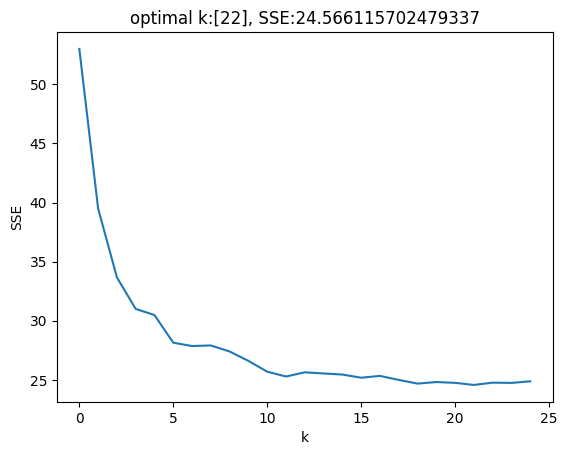

In [55]:
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

[83]


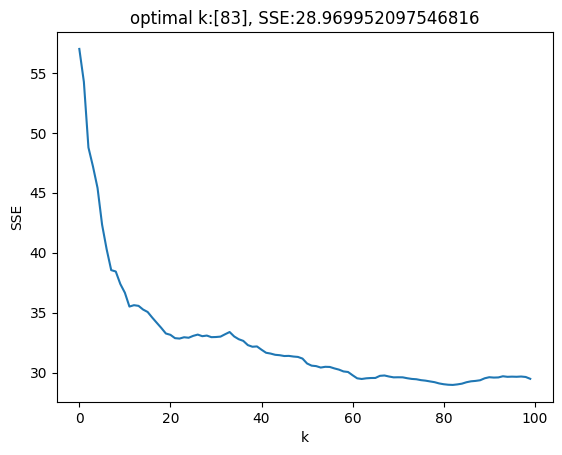

In [56]:
X = df.drop('DEATH_EVENT',axis=1)
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

from sklearn.neighbors import KNeighborsRegressor

k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

In this version, higher k value is perfered with a still relatively high SSE because there are more variables. The other model still has a high SSE, but does a better job of predicting.
